# Wrangle and Analyze Data Project
**by Ha Phuong Thao**

*This project is a part of [Data Analyst Nanodegree](https://udacity.com/course/data-analyst-nanodegree--nd002?v=a4) of Udacity.*

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent). WeRateDogs has over 4 million followers and has received international media coverage.

### Project Details

* Data wrangling, which consists of:
    * Gathering data
    * Assessing data
    * Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on 1) data wrangling efforts and 2) data analyses and visualizations

## Gather

In [2]:
import requests
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import re
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
# read WeRateDogs Twitter archive as data frame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download tweet image predictions programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)


In [3]:
# read image_prediction file as Pandas DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [10]:
#Twitter API keys, secrets, and tokens
consumer_key = 'QBcyAdhW2u5DTao0n8qaLEEZC'
consumer_secret = '2DOuVlzXwIaoBtUGY4BYAuzVZOS28xIjJIN5hwVASdwkrA0U6d'
access_token = '916143173780381696-W5CJbJSsAXcCj2Tq1RgVVPvAYzB15HZ'
access_secret = 'RAsNPJ1pa7Sgi5lLED8wBeNz5glqHweDwRJQGdJM0t6sZ'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [12]:
# reading json from a file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet_status = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            json.dump(tweet_status._json, outfile)
            outfile.write('\n')
        except:
            continue                

Rate limit reached. Sleeping for: 372
Rate limit reached. Sleeping for: 344


In [4]:
# list of dictionary to build a DataFrame of counted retweets and favorites 
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweets = tweet['retweet_count']
        favorites = tweet['favorite_count']
        # append list to dictionary
        df_list.append({'tweet_id': tweet_id,
                    'retweet_count': retweets,
                    'favorite_count': favorites})
        
tweet_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
976,749036806121881602,873,3352
467,816014286006976512,6013,0
593,798628517273620480,2227,0
1031,743895849529389061,1058,3926
2068,670826280409919488,4344,5815


## Assess

In [21]:
pd.set_option('display.max_colwidth', -1)

In [5]:
# display the twitter_achived table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
# display the image_predictions table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
# display the tweet data table
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8651,38988
1,892177421306343426,6354,33382
2,891815181378084864,4215,25158
3,891689557279858688,8764,42331
4,891327558926688256,9529,40494
5,891087950875897856,3159,20310
6,890971913173991426,2104,11911
7,890729181411237888,19170,65870
8,890609185150312448,4322,27894
9,890240255349198849,7527,32086


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [10]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 45.8+ KB


In [6]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
tweet_data.describe()

,retweet_count,favorite_count
count,2345.000000,2345.000000
mean,3044.714712,8103.000000
std,5062.290452,12187.169665
min,0.000000,0.000000
25%,609.000000,1408.000000
50%,1424.000000,3553.000000
75%,3552.000000,10022.000000
max,77793.000000,144012.000000


In [15]:
len(twitter_archive[twitter_archive['tweet_id'].duplicated()])

0

In [16]:
len(tweet_data[tweet_data['tweet_id'].duplicated()])

0

In [17]:
len(image_predictions[image_predictions['tweet_id'].duplicated()])

0

In [5]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [16]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Bailey              7
Toby                7
Buddy               7
an                  7
Daisy               7
Rusty               6
Koda                6
Bella               6
Stanley             6
Jack                6
Leo                 6
Scout               6
Dave                6
Milo                6
Jax                 6
Oscar               6
Sammy               5
                 ... 
Dylan               1
Alf                 1
Florence            1
Charleson           1
Schnozz             1
Brownie             1
Evy                 1
Thor                1
Kendall             1
Rover               1
Terrenth            1
Michelangelope      1
Tobi                1
Huxley              1
Mauve     

In [18]:
twitter_archive.loc[(twitter_archive.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [20]:
twitter_archive[twitter_archive.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [5]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
tweet_col = ['tweet_id','text','rating_numerator','rating_denominator','name']
twitter_archive[twitter_archive['rating_numerator']==1][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10,None
1446,696490539101908992,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10,None
1869,675153376133427200,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10,None
1940,673716320723169284,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,1,10,None
2038,671550332464455680,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10,None
2091,670783437142401025,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1,10,None
2261,667549055577362432,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10,None
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2,an
2338,666104133288665088,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1,10,None


In [24]:
twitter_archive.loc[twitter_archive.rating_numerator > 14][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10,None
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,None
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,None
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10,None
290,838150277551247360,@markhoppus 182/10,182,10,None
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10,None
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,Logan
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam


In [25]:
twitter_archive.loc[twitter_archive.rating_numerator < 10][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10,Jerry
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,None
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10,None
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10,Herschel
485,814578408554463233,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10,Beau
599,798682547630837760,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10,None
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10,None
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10,None
745,780092040432480260,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,10,Hank


In [28]:
twitter_archive['rating_denominator'].sort_values()

313     0  
2335    2  
516     7  
1576    10 
1575    10 
1574    10 
1573    10 
1572    10 
1563    10 
1570    10 
1569    10 
1568    10 
1567    10 
1566    10 
1565    10 
1564    10 
1577    10 
1571    10 
0       10 
1562    10 
1547    10 
1548    10 
1549    10 
1550    10 
1551    10 
1552    10 
1553    10 
1554    10 
1555    10 
1556    10 
        .. 
782     10 
781     10 
775     10 
799     10 
780     10 
779     10 
776     10 
777     10 
778     10 
800     10 
784     11 
1068    11 
1662    11 
342     15 
1663    16 
1165    20 
1598    20 
1433    40 
1202    50 
1351    50 
1274    50 
433     70 
1843    80 
1254    80 
1228    90 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [26]:
twitter_archive.loc[twitter_archive.rating_denominator != 10][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,None
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert


In [27]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [41]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

#### Quality
##### `twitter_archive` table
- errorneous data type 
    - *timestamp, retweeted_status_timestamp*
    - *tweet_id, retweeted_status_id, retweeted_status_user_id*
    - *retweet_count, favorite_count*
- Tweet data contains unoriginal tweets such as retweets and replying tweets.
- Tweets have no images.
- Tweets have unappropriate sources.
- Null values represented as non-null (None) values in *name* and *dog stage* columns.
- *Name* column contain missing/ misslabelled names of dog.
- Missing/ misspelled name of dog where it could be extracted from *text* column.
- Numerators in decimal numbers are extracted incorrectly.
- Numerators and denominators extracted inaccurately where *text* record has more than one fractions.

##### `image_predictions` table
- errorneous data type: *tweet_id*
- missing records (2356 instead of 2075)

##### `tweet_data` table
- missing records (2345 instead of 2356)


#### Tidiness
- four columns represent one variable dog stages (doggo, floofer, pupper, puppo) in `twitter_archive` table
- `tweet_count` and `image_prediction` tables should be joined with `twitter_archive` table

## Clean

In [28]:
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_data.copy()

### Tidiness

#### `twitter_archive`: Four columns represent one variable "dog stage"

##### Define
Extract dog stage information from *text* column and store it into *dog_stage* column. Drop all *doggo, flooper, pupper, puppo* columns from dataframe.

##### Code 

In [29]:
archive_clean['dog_stage'] = archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [30]:
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

##### Test

In [31]:
# Make sure the redundant columns have been eliminated
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 186.5+ KB


In [32]:
archive_clean.dog_stage.value_counts()

pupper     265
doggo      93 
puppo      37 
floofer    4  
Name: dog_stage, dtype: int64

In [33]:
archive_clean.dog_stage.sample(30)

863     NaN    
519     NaN    
2152    NaN    
726     NaN    
1003    NaN    
169     NaN    
2284    NaN    
2036    NaN    
372     doggo  
1030    doggo  
1359    NaN    
1122    pupper 
1027    pupper 
2190    NaN    
1284    NaN    
1345    NaN    
464     NaN    
381     NaN    
774     floofer
1449    pupper 
580     pupper 
371     NaN    
173     NaN    
2303    NaN    
1035    puppo  
1617    pupper 
1263    pupper 
694     NaN    
1767    NaN    
1648    NaN    
Name: dog_stage, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

#### `tweet_data` and `image_predictions` should be joined with `twitter_archive` table

##### Define
Combine `tweet_data` and `image_predictions` with `twitter_archive` dataframe by *tweet_id*

##### Code

In [34]:
# Convert tweet_id from archive and image table to str datatype in order to merge between three dataframe
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_predictions.tweet_id = image_predictions.tweet_id.astype(str)
twitter_clean = pd.merge(pd.merge(archive_clean, tweet_clean, on = 'tweet_id'), 
                         image_predictions, on = 'tweet_id')

##### Test

In [35]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
dog_stage                     338 non-null category
retweet_count                 2069 non-null int64
favorite_count                2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 

In [36]:
twitter_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1306,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you have a ton of work to do but then remember you have tomorrow off. 10/10 https://t.co/MfEaMUFYTx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688898160958271489/photo/1,https://twitter.com/dog_rates/status/688898160958271489/photo/1",...,1,Ibizan_hound,0.853170,True,Chihuahua,0.039897,True,Italian_greyhound,3.521960e-02,True
497,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,"https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1,https://twitter.com/dog_rates/status/789530877013393408/photo/1",...,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,1.510240e-01,True
1495,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312106393600/photo/1,...,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,5.603740e-02,True
1763,671520732782923777,NaN,NaN,2015-12-01 02:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Alejandro. He's an extremely seductive pup. 10/10 https://t.co/C7dPcCUNpF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671520732782923777/photo/1,...,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,6.155740e-02,False
1571,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bernie. He just touched a boob for the first time. 10/10 https://t.co/whQKMygnK6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442703122432/photo/1,...,1,beagle,0.681218,True,basset,0.125121,True,boxer,8.039820e-02,True
1561,676089483918516224,NaN,NaN,2015-12-13 17:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yes hello I'ma just snag this here toasted bagel real quick. carry on."" 9/10 https://t.co/Cuz0Osnekp",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676089483918516224/photo/1,...,1,bull_mastiff,0.743808,True,boxer,0.106697,True,American_Staffordshire_terrier,4.233530e-02,True
1593,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409102012420/photo/1,...,1,chow,0.999876,True,Tibetan_mastiff,0.000059,True,Tibetan_terrier,2.877850e-05,True
618,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1",...,1,Samoyed,0.940326,True,Pomeranian,0.055

### Quality

#### Erroneous data type 
- *Timestamp, retweeted_status_timestamp, retweet_count, favorite_count*

##### Define
- Convert *timestamp* to datetime object.
- Convert *retweet_count, favorite_count* to int data type

##### Code

In [92]:
# To int
twitter_clean.retweet_count = twitter_clean.retweet_count.fillna(0).astype(int)
twitter_clean.favorite_count = twitter_clean.favorite_count.fillna(0).astype(int)

# To datetime
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

# To numeric
twitter_clean.rating_numerator = pd.to_numeric(twitter_clean.rating_numerator,errors='coerce')

##### Test

In [93]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1970 entries, 892420643555336193 to 666020888022790149
Data columns (total 21 columns):
timestamp             1970 non-null datetime64[ns]
source                1970 non-null category
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null object
name                  1377 non-null object
dog_stage             322 non-null category
retweet_count         1970 non-null int32
favorite_count        1970 non-null int32
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object
p3_conf               1970 non-null float64
p

#### Not all tweets are original tweets, `twitter_clean` table includes retweets and reply tweets either.

##### Define
Remove all retweet records from `twitter_clean` table.

##### Code

In [39]:
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

##### Test

In [40]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null category
retweet_count            1994 non-null int32
favorite_count           1994 non-null int32
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf           

##### Define
Remove reply_tweet records

##### Code

In [41]:
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]
twitter_clean = twitter_clean.drop(['in_reply_to_status_id',"in_reply_to_user_id"], axis=1)

##### Test

In [42]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2068
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             322 non-null category
retweet_count         1971 non-null int32
favorite_count        1971 non-null int32
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-

#### Some records have no image urls

##### Define
Remove the records with no image urls.

##### Code

In [43]:
twitter_clean = twitter_clean.dropna(subset = ['expanded_urls'])

##### Test

In [44]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2068
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             322 non-null category
retweet_count         1971 non-null int32
favorite_count        1971 non-null int32
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-

#### Tweets have unappropriate sources

##### Define
Cut the sources html content

##### Code

In [90]:
new_source = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
             '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
             '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

twitter_clean['source'].replace(new_source, inplace = True)
twitter_clean['source'] = twitter_clean['source'].astype('category')

##### Test

In [91]:
twitter_clean['source'].unique()

[Twitter for iPhone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, TweetDeck]

#### *Name* column contains mislabelled, mispelled names . Null value represent as non-null (None) data

##### Define
Replace incorrect names which are in lowercase and replace them with NaN values.

##### Code

In [48]:
defaulted_name = []
defaulted_name = twitter_clean.loc[twitter_clean.name.str.islower()].name.unique()
defaulted_name

array(['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not',
       'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

In [49]:
# Replace misslabelled name with None
twitter_clean['name'].replace(defaulted_name, 'None', inplace = True)

In [50]:
# Replace all None value with NaN 
twitter_clean['name'].replace('None', np.NaN, inplace = True)

##### Test

In [51]:
try:
    twitter_clean.loc[twitter_clean.name.str.islower()]
except:
    print(None)

None


In [52]:
twitter_clean['name'].value_counts()

Charlie         11
Cooper          10
Oliver          10
Lucy            10
Penny           9 
Tucker          9 
Sadie           8 
Winston         8 
Daisy           7 
Toby            7 
Lola            7 
Koda            6 
Jax             6 
Stanley         6 
Bo              6 
Bella           6 
Chester         5 
Milo            5 
Rusty           5 
Leo             5 
Bailey          5 
Scout           5 
Oscar           5 
Buddy           5 
Dave            5 
Louis           5 
Finn            4 
Duke            4 
Cassie          4 
Clarence        4 
               .. 
Jennifur        1 
Robin           1 
Brandonald      1 
Jockson         1 
Tom             1 
Aja             1 
Chompsky        1 
Chuq            1 
Ralpher         1 
Pancake         1 
Lilah           1 
Gilbert         1 
Rufio           1 
Caryl           1 
Emmie           1 
Simba           1 
Crimson         1 
Alexanderson    1 
Zeus            1 
Oshie           1 
Superpup        1 
Nugget      

##### Define
Extract the exact name of dog from *text* column where the record contains 'named' 

##### Code

In [55]:
# Create named_list dataframe where the word 'named' appear in text column and we can use it to extract exact dog names.
named_list = twitter_clean[twitter_clean['text'].str.contains('named')]
named_list = named_list[['tweet_id','text','name']]
named_list

,tweet_id,text,name
1576,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN
1673,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN
1752,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN
1783,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN
1833,670427002554466305,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN
1842,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN
1845,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN
1863,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN
1877,669564461267722241,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN
1882,669363888236994561,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN


In [56]:
# Iterate through each row, find the correct dog name and assign it to 'name' column.
named_list = named_list.reset_index(level = 0, drop = True)
i = 0
for line in named_list.text:
    named_list.loc[i,'name'] = re.search('named ([A-Za-z]+[a-z]+?)', line).group(1)
    i += 1
named_list

,tweet_id,text,name
0,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie
1,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,Kip
2,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob
3,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus
4,670427002554466305,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,Spork
5,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,Cherokee
6,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,Hemry
7,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,Alphred
8,669564461267722241,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo
9,669363888236994561,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,Zeus


In [57]:
# Merge the correct name from named_list table to twitter_clean table
twitter_clean = twitter_clean.set_index('tweet_id')
twitter_clean['name'] = twitter_clean['name'].combine_first(named_list.set_index("tweet_id")['name'])

##### Test

In [58]:
id_list = list(named_list.tweet_id)
for i in id_list:
    print(twitter_clean.loc[i]['name'])

Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Zeus
Leroi
Berta
Chuk
Guss
Alfonso
Cheryl
Jessiga
Klint
Tickles
Kohl
Pepe
Octaviath
Johm


##### Define
Extract the exact name of dog from *text* column where record contains the substring 'name is'

##### Code

In [59]:
# Create named_list dataframe where the word 'name is' appear in text column and we can use it to extract exact dog names.
name_is_list = twitter_clean[twitter_clean.text.str.contains('name is')]
name_is_list = name_is_list[['text','name']]
name_is_list

,text,name
tweet_id,,
859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN
765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN
682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN
679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN
667524857454854144,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN
667177989038297088,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN
666739327293083650,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,Lugan


In [60]:
# Drop the row where name is appeared incorrectly
name_is_list.drop(['666739327293083650'])

,text,name
tweet_id,,
859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN
765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN
682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN
679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN
667524857454854144,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN
667177989038297088,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN


In [61]:
# Iterate through each row, find the correct dog name and assign it to 'name' column.
name_is_list = name_is_list.reset_index(level = 0)
i = 0
for line in name_is_list.text:
    try:
        name_is_list.loc[i,'name'] = re.search("name is (([A-Za-z]+[a-z]+)+)", line).group(1)
        i += 1
    except AttributeError:
        name_is_list.loc[i,'name'] = None
name_is_list

,tweet_id,text,name
0,859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,Zoey
1,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,Zoey
2,682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,Thea
3,679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,Sabertooth
4,667524857454854144,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,Big
5,667177989038297088,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,Daryl
6,666739327293083650,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,Rocky


In [62]:
# Manually adjust dog name with '667524857454854144' id
twitter_clean['name'] = twitter_clean['name'].combine_first(name_is_list.set_index("tweet_id")['name'])
twitter_clean.name.loc['667524857454854144']= 'Big Jumpy Rat'

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [63]:
twitter_clean[twitter_clean.text.str.contains('name is')].name

tweet_id
859607811541651456    Zoey         
765395769549590528    Zoey         
682047327939461121    Thea         
679736210798047232    Sabertooth   
667524857454854144    Big Jumpy Rat
667177989038297088    Daryl        
666739327293083650    Lugan        
Name: name, dtype: object

#### Several numerators and denominators are extracted inaccurately

##### Define
Extract and replace false numerators where ratings are in decimal number.

In [61]:
# View records from 'text' column containing rating in decimal numbers
twitter_clean[twitter_clean.text.str.contains(r'(\d+\.\d*\/\d+)')]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN,10120,46183,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,6897,19957,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,NaN,1836,7184,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,pupper,531,1840,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


##### Code

In [62]:
# Store the correct decimals into Series
correct_decimals = twitter_clean.text.str.extract('(\d+\.\d+\/)').dropna()
correct_decimals

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


tweet_id
883482846933004288    13.5/ 
786709082849828864    9.75/ 
778027034220126208    11.27/
680494726643068929    11.26/
Name: text, dtype: object

In [63]:
# From 'correct_decimals', iterate through tweet_id and replace correct decimals to twitter_clean table
for i in correct_decimals.index:
    twitter_clean.rating_numerator.loc[i]= float(correct_decimals[i][:-1])
    print(twitter_clean.loc[i]['rating_numerator'])

13.5
9.75
11.27
11.26


C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [64]:
twitter_clean[twitter_clean.text.str.contains(r'(\d+\.\d*\/\d+)')]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,NaN,10120,46183,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,6897,19957,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,NaN,1836,7184,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,pupper,531,1840,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


##### Define
Adjust numerator and denominator records where the fraction was extracted inaccurately.

In [74]:
# View the data where there are more than one rating in each text record
tweet_col = ['text', 'rating_numerator', 'rating_denominator', 'name']
twitter_clean[twitter_clean['text'].str.contains(r"(\d+\/\d+)\s*.*(\d+\/\d+)\s?")][tweet_col]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator,name
tweet_id,,,,
777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10,NaN
747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10,Bookstore
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,NaN
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,NaN
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert
714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10,Travis
703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10,Socks
695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10,NaN
694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10,Oliviér


##### Code

In [75]:
# Manually adjust incorrect ratings  
incorrect_fraction = {'740373189193256964':'14/10',
                      '722974582966214656':'13/10',
                      '716439118184652801':'11/10',
                      '682962037429899265':'10/10',
                      '666287406224695296':'9/10'}
for i in incorrect_fraction:
    twitter_clean.rating_numerator.loc[i]= incorrect_fraction[i].split('/')[0]
    twitter_clean.rating_denominator.loc[i]= incorrect_fraction[i].split('/')[1]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [81]:
for i in incorrect_fraction:
    print(twitter_clean.loc[i,['rating_numerator','rating_denominator']])

rating_numerator      14
rating_denominator    10
Name: 740373189193256964, dtype: object
rating_numerator      13
rating_denominator    10
Name: 722974582966214656, dtype: object
rating_numerator      11
rating_denominator    10
Name: 716439118184652801, dtype: object
rating_numerator      10
rating_denominator    10
Name: 682962037429899265, dtype: object
rating_numerator      9 
rating_denominator    10
Name: 666287406224695296, dtype: object


##### Define
Remove tweet that has no rating. Tweet id '810984652412424192'

##### Code

In [82]:
twitter_clean = twitter_clean.drop('810984652412424192')

##### Test

In [83]:
try:
    twitter_clean.loc['810984652412424192']
except:
    print(None)

None


## Store

In [196]:
# Store the final dataframe in one main csv file
df_master = twitter_clean.copy()
df_master.to_csv('twitter_archive_master.csv')

## Analyze

In [3]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [4]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8651,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6354,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4215,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8764,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9529,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3159,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,2104,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,19170,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4322,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7527,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [5]:
# Convert data to proper type and set timestamp as index
df_master.rating_numerator = df_master.rating_numerator.astype(float)
df_master = df_master.set_index('timestamp')

### 1. Which species of dog are more popular on WeRateDogs?

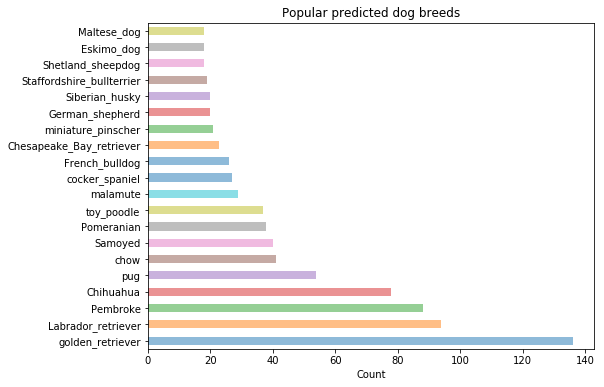

In [6]:
# Subset dog breeds by p1 column data and plot the data
dog_type = df_master.loc[df_master['p1_dog']==True, 'p1'].value_counts().head(20)

dog_type.plot(kind='barh',align = 'center', alpha=0.5, figsize = (8,6))
plt.title('Popular predicted dog breeds')
plt.xlabel('Count')
plt.savefig('Dog_breed', bbox_inches = 'tight')

### 2. Dog rating over time

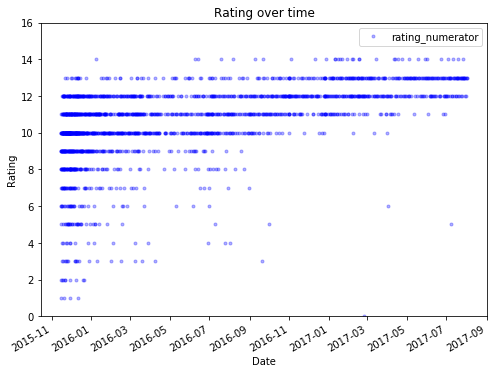

In [203]:
# Plot dog rating by 'rating numerator' column
df_master.plot(y='rating_numerator', ylim = [0,16], style = '.', alpha= .3, color = 'blue', figsize = (8,6))
plt.title('Rating over time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.savefig('Rating')

### 3. Distribution of dog stages

In [9]:
# Subset the dog_stage column from master dataframe
dog_stage = df_master[['dog_stage']].dropna()
dog_stage['dog_stage'] = dog_stage['dog_stage'].astype(str)

In [10]:
# Create a dataframe counting number and percentage of dog stages available
a = dog_stage.groupby('dog_stage')['dog_stage'].agg(['count']).reset_index()
a['percentage'] = (a['count']*100)/(a['count'].sum())
a['percentage'] = a['percentage'].round(2)
a

,dog_stage,count,percentage
0,doggo,71,22.05
1,floofer,3,0.93
2,pupper,220,68.32
3,puppo,28,8.70


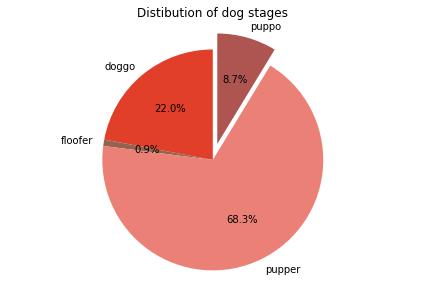

In [11]:
# Plot the data
colors = ["#E13F29", "#96624E", "#EB8076", "#AE5552"]
plt.pie(a['percentage'], labels=a['dog_stage'], shadow=False,
        colors = colors, explode=(0, 0, 0, 0.15),startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title('Distibution of dog stages')
plt.savefig('Dog_stage', bbox_inches = 'tight')

### Compare Rating between dog stage and dog breeds

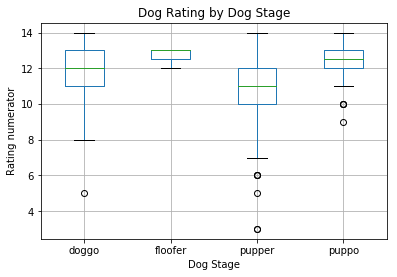

In [13]:
# Dog Rating on discrete dog stage
ax = df_master[(df_master['dog_stage']!='None')&(df_master['rating_numerator']<20)].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
ax.get_figure().suptitle('')
plt.title('Dog Rating by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Rating numerator')
plt.savefig('dog_stage', bbox_inches = 'tight')

In [37]:
# Create the dataframe of top 15 most popular dog
Top15 = df_master.loc[df_master['p1_dog']==True, 'p1'].value_counts().head(15)
Top15 = df_master[df_master['p1'].isin(Top15.keys())].reset_index()
Top15 = Top15[['p1','rating_numerator','retweet_count','favorite_count']]

In [38]:
Top15.groupby('p1').describe()

favorite_count                                     \
                                  count          mean           std    min   
p1                                                                           
Chesapeake_Bay_retriever           23.0  10412.695652  16854.451455  168.0   
Chihuahua                          78.0   8727.730769  16358.985016  129.0   
French_bulldog                     26.0  18401.153846  25100.646809  333.0   
German_shepherd                    20.0   9985.800000   9145.743258  125.0   
Labrador_retriever                 94.0  11680.968085  17034.300629  309.0   
Pembroke                           88.0  11339.602273  12306.467191  166.0   
Pomeranian                         38.0   8013.105263  12345.534159  394.0   
Samoyed                            40.0  13353.250000  14073.955504  791.0   
chow                               41.0   9969.707317  12540.411483  441.0   
cocker_spaniel                     27.0  11502.777778  12712.422130  295.0   
golden_retriever                  136.0  12352.779412  13046.840825  193.0   
malamute                           29.0   8662.344828   8460.401608  225.0   
miniature_pinscher                 21.0   8797.095238  10047.806253  109.0   
pug                                54.0   5829.500000   8185.840791  120.0   
toy_poodle                         37.0   6653.108108   9380.755504  257.0   

                                                                \
                              25%      50%       75%       max   
p1                                                               
Chesapeake_Bay_retriever  2374.50   5656.0  10552.00   80364.0   
Chihuahua                 1272.75   2893.0  10438.25  123500.0   
French_bulldog            3250.50  10241.0  25090.25  124728.0   
German_shepherd           5268.00   7024.0  12722.25   36554.0   
Labrador_retriever        2233.25   5487.5  16076.25  128862.0   
Pembroke                  3167.50   6428.0  15171.75   69449.0   
Pomeranian                1902.00   3009.5   8731.75   65870.0   
Samoyed                   2840.00   7311.5  20461.25   53771.0   
chow                      3780.00   6760.0  11142.00   76717.0   
cocker_spaniel            2574.50   8327.0  15453.50   56670.0   
golden_retriever          3523.50   8142.5  16111.50   83727.0   
malamute                  2952.00   6906.0  10885.00   38905.0   
miniature_pinscher        2626.00   3809.0  10017.00   34340.0   
pug                       1643.00   2589.5   5721.50   36174.0   
toy_poodle                1370.00   4073.0   7559.00   48901.0   

                         rating_numerator              ...                  \
                                    count       mean   ...      75%    max   
p1                                                     ...                   
Chesapeake_Bay_retriever             23.0  10.782609   ...     12.0   13.0   
Chihuahua                            78.0  10.692308   ...     12.0   14.0   
French_bulldog                       26.0  11.269231   ...     12.0   14.0   
German_shepherd                      20.0  11.000000   ...     12.0   13.0   
Labrador_retriever                   94.0  13.936170   ...     12.0  165.0   
Pembroke                             88.0  11.443182   ...     12.0   14.0   
Pomeranian                           38.0  12.868421   ...     12.0   75.0   
Samoyed                              40.0  11.700000   ...     13.0   14.0   
chow                                 41.0  11.609756   ...     12.0   13.0   
cocker_spaniel                       27.0  11.296296   ...     12.0   13.0   
golden_retriever                    136.0  12.227941   ...     12.0   99.0   
malamute                             29.0  10.896552   ...     12.0   13.0   
miniature_pinscher                   21.0  10.666667   ...     12.0   12.0   
pug                                  54.0  10.240741   ...     11.0   13.0   
toy_poodle                           37.0  11.054054   ...     12.0   13.0   

                         r

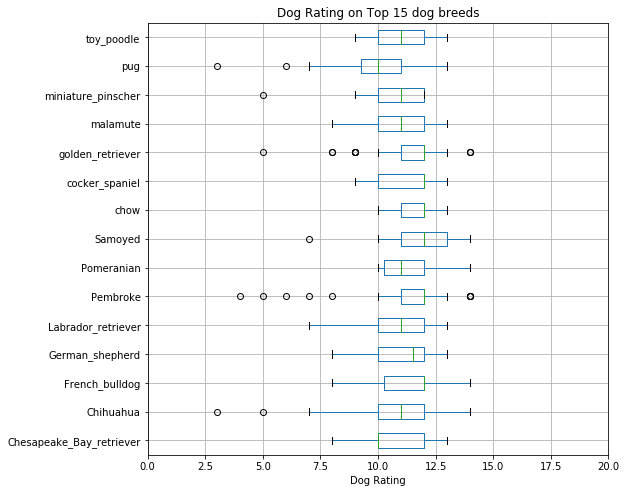

In [39]:
# Plot rating on Top 20 dog breeds
ax = Top15.boxplot(column = ['rating_numerator'], by = ['p1'], vert = False, figsize = (8,8))
ax.set_xlim(0,20)
ax.get_figure().suptitle('')
plt.title('Dog Rating on Top 15 dog breeds')
plt.xlabel('Dog Rating')
plt.savefig('Top15_rating', bbox_inches = 'tight')

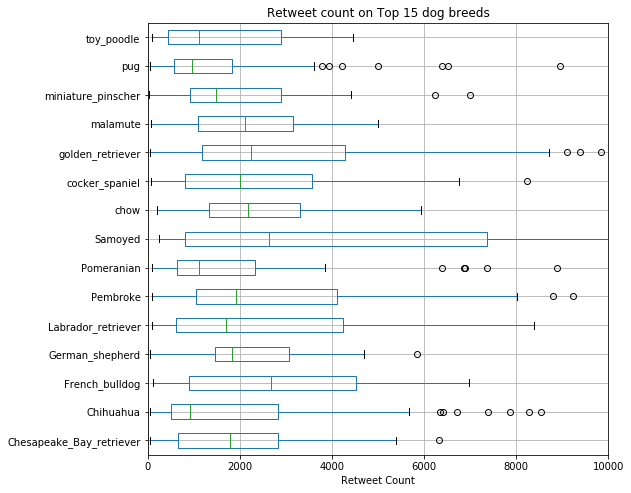

In [42]:
# plot retweet_count on Top 20 dog breeds
ax_1 = Top15.boxplot(column = ['retweet_count'], by = ['p1'], vert = False, figsize = (8,8))
ax_1.set_xlim(0,10000)
ax_1.get_figure().suptitle('')
plt.title('Retweet count on Top 15 dog breeds')
plt.xlabel('Retweet Count')
plt.savefig('Top15_retweet', bbox_inches = 'tight')

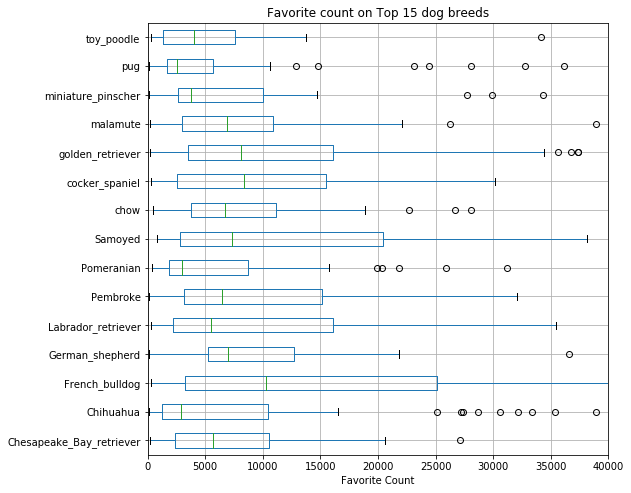

In [43]:
# plot favorite_count on Top 20 dog breeds
ax_2 = Top15.boxplot(column = ['favorite_count'], by = ['p1'], vert = False, figsize = (8,8))
ax_2.set_xlim(0,40000)
ax_2.get_figure().suptitle('')
plt.title('Favorite count on Top 15 dog breeds')
plt.xlabel('Favorite Count')
plt.savefig('Top15_favorite', bbox_inches = 'tight')